<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme du Lagrangien Augmenté </h1>
</center>

## Implémentation

1. Implémenter l'algorithme du lagrangien augmenté, en utilisant les différentes méthodes
qui ont été vues en première partie pour la résolution de la suite de problémes sans
contraintes (fichier `Lagrangien_Augmente.jl`). La spécification de l'algorithme du Lagrangien augmenté est donnée ci-dessous.
 

In [2]:
using LinearAlgebra
using Documenter
using Markdown  
include("Lagrangien_Augmente.jl")
@doc Lagrangien_Augmente

#### Objet

Résolution des problèmes de minimisation avec une contrainte d'égalité scalaire par l'algorithme du lagrangien augmenté.

#### Syntaxe

```julia
xmin,fxmin,flag,iter,muks,lambdaks = Lagrangien_Augmente(algo,f,gradf,hessf,c,gradc,hessc,x0,options)
```

#### Entrées

  * algo : (String) l'algorithme sans contraintes à utiliser:

      * "newton"  : pour l'algorithme de Newton
      * "cauchy"  : pour le pas de Cauchy
      * "gct"     : pour le gradient conjugué tronqué
  * f : (Function) la fonction à minimiser
  * gradf       : (Function) le gradient de la fonction
  * hessf       : (Function) la hessienne de la fonction
  * c     : (Function) la contrainte [x est dans le domaine des contraintes ssi $c(x)=0$]
  * gradc : (Function) le gradient de la contrainte
  * hessc : (Function) la hessienne de la contrainte
  * x0 : (Array{Float,1}) la première composante du point de départ du Lagrangien
  * options : (Array{Float,1})

    1. epsilon     : utilisé dans les critères d'arrêt
    2. tol         : la tolérance utilisée dans les critères d'arrêt
    3. itermax     : nombre maximal d'itération dans la boucle principale
    4. lambda0     : la deuxième composante du point de départ du Lagrangien
    5. mu0, tho    : valeurs initiales des variables de l'algorithme

#### Sorties

  * xmin : (Array{Float,1}) une approximation de la solution du problème avec contraintes
  * fxmin : (Float) $f(x_{min})$
  * flag : (Integer) indicateur du déroulement de l'algorithme

      * 0    : convergence
      * 1    : nombre maximal d'itération atteint
      * (-1) : une erreur s'est produite
  * niters : (Integer) nombre d'itérations réalisées
  * muks : (Array{Float64,1}) tableau des valeurs prises par mu_k au cours de l'exécution
  * lambdaks : (Array{Float64,1}) tableau des valeurs prises par lambda_k au cours de l'exécution

#### Exemple d'appel

```julia
using LinearAlgebra
algo = "gct" # ou newton|gct
f(x)=100*(x[2]-x[1]^2)^2+(1-x[1])^2
gradf(x)=[-400*x[1]*(x[2]-x[1]^2)-2*(1-x[1]) ; 200*(x[2]-x[1]^2)]
hessf(x)=[-400*(x[2]-3*x[1]^2)+2  -400*x[1];-400*x[1]  200]
c(x) =  (x[1]^2) + (x[2]^2) -1.5
gradc(x) = [2*x[1] ;2*x[2]]
hessc(x) = [2 0;0 2]
x0 = [1; 0]
options = []
xmin,fxmin,flag,iter,muks,lambdaks = Lagrangien_Augmente(algo,f,gradf,hessf,c,gradc,hessc,x0,options)
```

#### Tolérances des algorithmes appelés

Pour les tolérances définies dans les algorithmes appelés (Newton et régions de confiance), prendre les tolérances par défaut définies dans ces algorithmes.


3. Vérifier que les tests ci-dessous passent.

In [3]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(
    eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_lagrangien_augmente.jl")
include("../src/Algorithme_De_Newton.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Gradient_Conjugue_Tronque.jl")
include("../src/Regions_De_Confiance.jl")
include("../src/Lagrangien_Augmente.jl")

affiche = true

@testset "Test lagrangien augmente" begin
	tester_lagrangien_augmente(affiche, Lagrangien_Augmente)
end;

-------------------------------------------------------------------------
Résultats de : Lagrangien augmenté avec newton appliqué à fonction 1 au point initial x01 :
  * xsol = [0.5000000120317561, 1.2499999939841218, 0.5000000120317564]
  * f(xsol) = 0
  * nb_iters = 9
  * flag = 0
  * sol_exacte : [0.5, 1.25, 0.5]
-------------------------------------------------------------------------
Résultats de : Lagrangien augmenté avec newton appliqué à fonction 1 au point initial x02 :
  * xsol = [0.5000000120317561, 1.2499999939841218, 0.5000000120317564]
  * f(xsol) = 0
  * nb_iters = 9
  * flag = 0
  * sol_exacte : [0.5, 1.25, 0.5]
-------------------------------------------------------------------------
Résultats de : Lagrangien augmenté avec newton appliqué à fonction 2 au point initial x03 :
  * xsol = [0.9072336571162266, 0.8227549044924193]
  * f(xsol) = 0
  * nb_iters = 5
  * flag = 0
  * sol_exacte : [0.9072339605110892, 0.82275545631455]
--------------------------------------------

## Interprétation

 1. Commenter les résultats obtenus, en étudiant notamment les valeurs de $\lambda_k$ et $\mu_k$.
 
 2. Étudier l'influence du paramètre $\tau$ dans la performance de l'algorithme. Pour cela Vous réaliserez des tests numériques.
 
 3. **Supplémentaire** : 
      Que proposez-vous comme méthode pour la résolution des problèmes avec
      des contraintes à la fois d'égalité et d'inégalité ? Implémenter (si le temps le permet)
      ce nouvel algorithme.

### Réponses

    Question 1.

On remarque que les solutions sont très proches des solutions exactes et en un faible nombre d'itérations. 

La valeur de $\lambda_k$ varie beaucoup entre $f_1$ et $f_2$ ($4.5$ pour $f_1$ et $3.8^{-2}$ pour $f_2$) mais ne dépend pas du choix de l'algorithme. De plus la valeur stagne dès la 2e mise à jour de  $\lambda_k$. 

Pour "newton" et "gct", on a la même évolution pour $\mu_k$, par contre pour "cauchy", $\mu_k$ augmente aussi bien pour $f_1$ (160 -> 1280) que pour $f_2$ (40 -> 160).


    Question 2.

Dans l'algorithme, on a $\mu_{k+1} = \tau\mu_k$. 
Donc lorsque $\tau$ augmente, $\mu_k$ augmente et le nombre d'itération nécessaire pour trouver la solution diminue. $\tau$ est utilisé pour mettre à jour la valeur de $\mu_k$ puis des autres paramètres ($\epsilon_k$ et $\eta_k$) lorsque la solution trouvée pour minimiser le sous problème sans contraintes ne vérifie pas les contraintes du problème global.

On trace des graphiques pour s'en rendre compte, on voit bien que $\mu$ croît avec $\tau$ et que le nombre d'itérations chute lorsque $\tau$ est grand.


    Question 3.

Un problème avec des contraintes d'égalité et d'inégalité s'écrit : 

$(P) : min_{x \in R^n} f(x) $

$c_e(x) = 0$

$c_i(x) \le 0 $
  
On peut transformer la contrainte d'inégalité en une nouvelle contrainte d'égalité en ajoutant un paramètre r tel que  : 
    $c_i(x) + r = 0 , r \ge 0$ 

Algorithmiquement, il faudrait considérer en plus dans la fonction $L_A$ la condition $r \ge 0$ et ajouter dans les contraintes déjà présentes de la contrainte $x \to c_i + r$.    





 mu_final pour f1 : 160.0
 lambda_final pour f1 : 4.499997966633192

 mu_final pour f2 : 40.0
 lambda_final pour f2: 0.03865150236679149


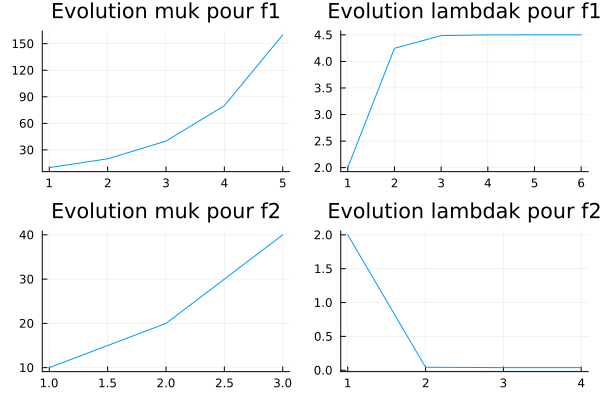

In [25]:
using Plots

lambda0 = 2
mu0 = 10
tho = 2
epsilon = 1.
tol = 1e-5
max_iters = 1000
options = [epsilon, tol, max_iters, lambda0, mu0, tho]

xmin,fxmin,flag,iter,muks1,lambdaks1 = Lagrangien_Augmente("gct",fct1,contrainte1,grad_fct1,hess_fct1,grad_contrainte1,hess_contrainte1,pts2.x02,options)

println("\n mu_final pour f1 : ", muks1[length(muks1)], "\n lambda_final pour f1 : ", lambdaks1[length(lambdaks1)])


xmin,fxmin,flag,nbiters, muks2, lambdaks2 = Lagrangien_Augmente("gct",fct2,contrainte2,grad_fct2,hess_fct2,grad_contrainte2,
hess_contrainte2,pts2.x03,options)

println("\n mu_final pour f2 : ", muks2[length(muks2)], "\n lambda_final pour f2: ", lambdaks2[length(lambdaks2)])

p1 = plot([1:length(muks1)], muks1, title="Evolution muk pour f1")
p2 = plot([1:length(lambdaks1)], lambdaks1, title="Evolution lambdak pour f1")
p3 = plot([1:length(muks2)], muks2, title="Evolution muk pour f2")
p4 = plot([1:length(lambdaks2)], lambdaks2, title="Evolution lambdak pour f2")
plot(p1,p2,p3,p4, layout=(2,2), legend=false)


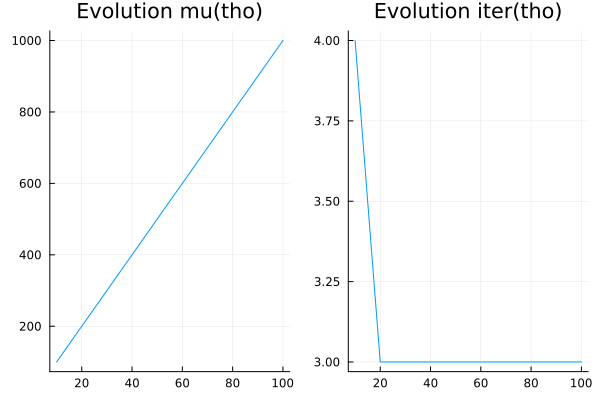

In [36]:
using Plots

lambda0 = 2
mu0 = 10
thos = [10*i for i in 1:10]
epsilon = 1.
tol = 1e-5
max_iters = 1000
tol_erreur = 1e-4

iters=[]
mus=[]

for tho in thos
    options = [epsilon, tol, max_iters, lambda0, mu0, tho]
    xmin,fxmin,flag,nbiters, muks, lambdaks = Lagrangien_Augmente("gct",fct2,contrainte2,grad_fct2,hess_fct2,grad_contrainte2,hess_contrainte2,pts2.x03,options)
    push!(mus, muks[length(muks)])
    push!(iters, nbiters)
end

p_mu = plot(thos, mus, title="Evolution mu(tho)")
p_it = plot(thos, iters, title="Evolution iter(tho)")

plot(p_mu,p_it, legend=false)
